# GOOGLE PLAY STORE DATA ANALYSIS
### Made By - [`Pratyush Puri`](https://www.pratyushpuri.space)
### [`Linkedin`](https://www.linkedin.com/in/pratyushpuri) --- [`GitHub`](https://www.github.com/PratyushPuri)

<br><br>

## DATA LOADING AND INITIAL EXPLORATION


In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

w.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
#data loading
url = '/kaggle/input/google-play-store-apps/googleplaystore.csv'
df = pd.read_csv(url)
df.sample(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4551,R Programming Language (Paperset 2) MCQ Quiz,FAMILY,NaN,0,3.4M,10+,Free,0,Everyone,Education,"March 19, 2018",1.0,4.0.3 and up
8677,DP Editor,PHOTOGRAPHY,4.3,18,15M,"5,000+",Free,0,Teen,Photography,"August 4, 2018",1.5,4.1 and up
3482,"Evernote – Organizer, Planner for Notes & Memos",PRODUCTIVITY,4.6,1488396,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"August 3, 2018",Varies with device,Varies with device
10047,Advanced EX for KIA,TOOLS,3.3,257,160k,"5,000+",Paid,$4.99,Everyone,Tools,"March 14, 2015",1.4,1.6 and up
10752,FP FCU,FINANCE,3.6,48,26M,"5,000+",Free,0,Everyone,Finance,"April 5, 2018",4.6.71,4.0.3 and up
7621,Multicraft Miner Exploration,GAME,4.0,14563,74M,"1,000,000+",Free,0,Everyone 10+,Adventure,"December 22, 2017",0.6.49,4.1 and up
10596,Free Florida DMV Test 2018,FAMILY,4.1,665,5.3M,"50,000+",Free,0,Everyone,Education,"May 24, 2018",8.1,4.0.3 and up


In [3]:
# verification of total records

display(f'Total Features in the dataset are {df.shape[1]}')
display(f'Total Records in the dataset are {df.shape[0]}')

'Total Features in the dataset are 13'

'Total Records in the dataset are 10841'

In [4]:
# describing columns in the dataset
display(df.columns.to_list())

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [5]:
# giving all datatypes of the columns
display(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
#checking for unique values present
display(df.nunique())

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

<Axes: ylabel='Density'>

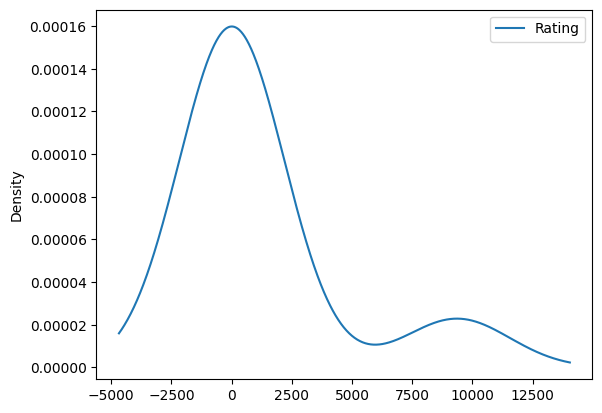

In [7]:
#describing the columns present
display(df.describe(include='all').plot(kind='kde'))

In [8]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# checking information about all features
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


None

Here, some of the datatypes here of some columns does not match. So, in the upcoming section we ought to change it.

## DATA CLEANING

In [10]:
# checking for duplicated values
print(df.duplicated().sum())

483


In [11]:
#dropping all duplicates
print(df.drop_duplicates(inplace=True))
print(df.duplicated().sum())

None
0


In [12]:
# checking for null values
display(df.isnull().sum())

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

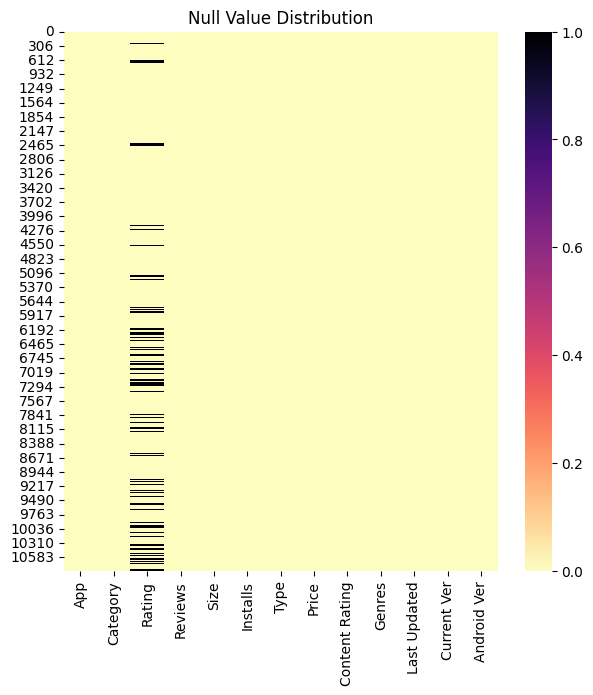

In [13]:
# Plotting null values
plt.figure(figsize=(7,7))
sns.heatmap(df.isnull(), cbar=True, cmap='magma_r')
plt.title('Null Value Distribution')
plt.show()

In [14]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f'''{col} of type '{df[col].dtype}' has {df[col].isnull().sum()}/{df.shape[0]} null values with {round(((df[col].isnull().sum())/(df.shape[0])*100),3)}%''')

Rating of type 'float64' has 1465/10358 null values with 14.144%
Type of type 'object' has 1/10358 null values with 0.01%
Content Rating of type 'object' has 1/10358 null values with 0.01%
Current Ver of type 'object' has 8/10358 null values with 0.077%
Android Ver of type 'object' has 3/10358 null values with 0.029%


In [15]:
# Since, `Rating` contains 14% null values we are going to fill it with mean
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

Also, all the null value columns like `Current Ver`, `Content Rating`, `Android Ver` and `Type` which have tremendous low null values should be dropped

In [16]:
# Drop rows with null values in specified columns
columns_to_drop_nulls = ['Current Ver', 'Content Rating', 'Android Ver', 'Type']
df.dropna(subset=columns_to_drop_nulls, inplace=True)

# Verify that null values have been dropped
display(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

We can see `Category` and `Genres` contain same values so we ought to drop and one column, say `Category`

In [17]:
# Drop the 'Category' column
df.drop('Genres', axis=1, inplace=True)

# Verify the column has been dropped
display(df.columns.to_list())

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Last Updated',
 'Current Ver',
 'Android Ver']

Now, we ought to change the datatype of some columns which need it

In [18]:
#changing 'Reviews' from object to int64
df['Reviews'] = df['Reviews'].astype('int64')

#changing 'Last Updated' from Object to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])


In [19]:
# Clean the 'Price' column and convert to float64
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].astype('float64')

# Verify the conversion
display(df['Price'].dtype)
display(df['Price'].sample(5))

dtype('float64')

1755    0.0
5889    0.0
8153    0.0
3084    0.0
1996    0.0
Name: Price, dtype: float64

Making new columns based on some previous ones...

Making a column `Min_Runnable_Android_Ver` based on `Android Ver`

In [20]:
def extract_version_float(android_ver):
    if isinstance(android_ver, str):
        parts = android_ver.split(' and up')[0].split('-')[0].split('.')
        try:
            return float('.'.join(parts[:2]))
        except ValueError:
            return np.nan
    return np.nan

df['Min_Runnable_Android_Ver'] = df['Android Ver'].apply(extract_version_float)

display(df[['Android Ver', 'Min_Runnable_Android_Ver']].sample(5))
display(df['Min_Runnable_Android_Ver'].dtype)

,Android Ver,Min_Runnable_Android_Ver
7770,4.1 and up,4.1
1043,4.3 and up,4.3
6552,4.0.3 and up,4.0
1102,4.0 and up,4.0
1659,2.3 and up,2.3


dtype('float64')

In [21]:
# newly formed null values
print(df['Min_Runnable_Android_Ver'].isnull().sum())

1231


In [22]:
# handling such null values by filling median values
df['Min_Runnable_Android_Ver'].fillna(df['Min_Runnable_Android_Ver'].median(), inplace=True)

# Verify that null values have been filled
print(df['Min_Runnable_Android_Ver'].isnull().sum())

0


Making a column `Avg_Installs` based on `Installs`

In [23]:
# Clean the 'Installs' column and convert to int64
df['Avg_Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Avg_Installs'] = df['Avg_Installs'].astype('int64')

# Verify the conversion
display(df['Avg_Installs'].dtype)
display(df['Avg_Installs'].sample(5))

dtype('int64')

10791     50000
5491       1000
2262        100
6228     100000
9387     500000
Name: Avg_Installs, dtype: int64

In [24]:
# newly formed null values
print(df['Avg_Installs'].isnull().sum())

0


## EXPLORATORY DATA ANALYSIS

### What is the average rating of apps in the dataset?

The average rating of apps in the dataset is: 4.19


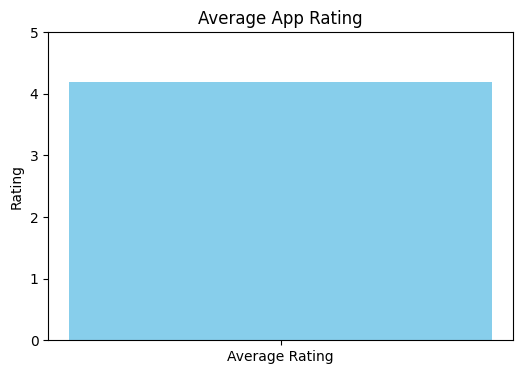

In [25]:
# Calculate the average rating
average_rating = df['Rating'].mean()

# Display the average rating
print(f"The average rating of apps in the dataset is: {average_rating:.2f}")

# Create a visualization for the average rating
plt.figure(figsize=(6, 4))
plt.bar(['Average Rating'], [average_rating], color='skyblue')
plt.ylim(0, 5) # Rating is on a scale of 0 to 5
plt.ylabel('Rating')
plt.title('Average App Rating')
plt.show()

###  How many unique categories of apps are there?

In [26]:
# Count the number of unique categories
unique_categories_count = df['Category'].nunique()

# Display the number of unique categories
print(f"There are {unique_categories_count} unique categories of apps in the dataset.")

There are 33 unique categories of apps in the dataset.


### What is the distribution of app sizes?

In [27]:
def convert_size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024  # Convert KB to MB
        elif 'Varies with device' in size:
            return np.nan  # Handle 'Varies with device' as NaN for now
    return np.nan

df['Size_MB'] = df['Size'].apply(convert_size_to_mb)

# Fill NaN values in 'Size_MB' with the median of the numerical sizes
df['Size_MB'].fillna(df['Size_MB'].median(), inplace=True)

display(df[['Size', 'Size_MB']].sample(5))
display(df['Size_MB'].dtype)

,Size,Size_MB
5550,30M,30.0
8801,58M,58.0
1350,49M,49.0
1947,32M,32.0
75,3.4M,3.4


dtype('float64')

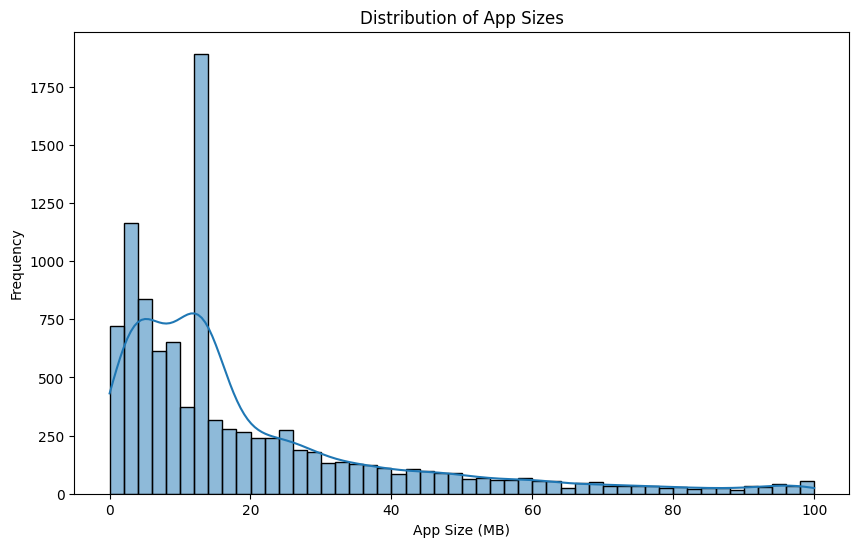

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Size_MB'], bins=50, kde=True)
plt.xlabel('App Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.show()

### How many free vs paid apps are there?

Distribution of App Types:
Type
Free    9584
Paid     762
Name: count, dtype: int64


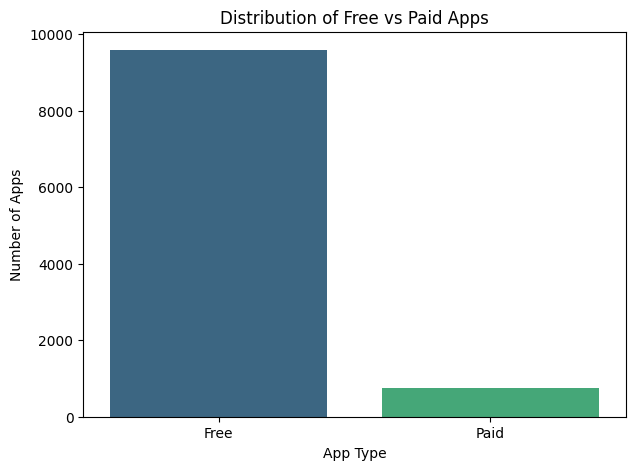

In [29]:
# Count the number of free vs paid apps
app_type_counts = df['Type'].value_counts()

# Display the counts
print("Distribution of App Types:")
print(app_type_counts)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(7, 5))
sns.barplot(x=app_type_counts.index, y=app_type_counts.values, palette='viridis')
plt.xlabel('App Type')
plt.ylabel('Number of Apps')
plt.title('Distribution of Free vs Paid Apps')
plt.show()

### What is the most common content rating for apps?

The most common content rating is: Everyone

Distribution of Content Ratings:


Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

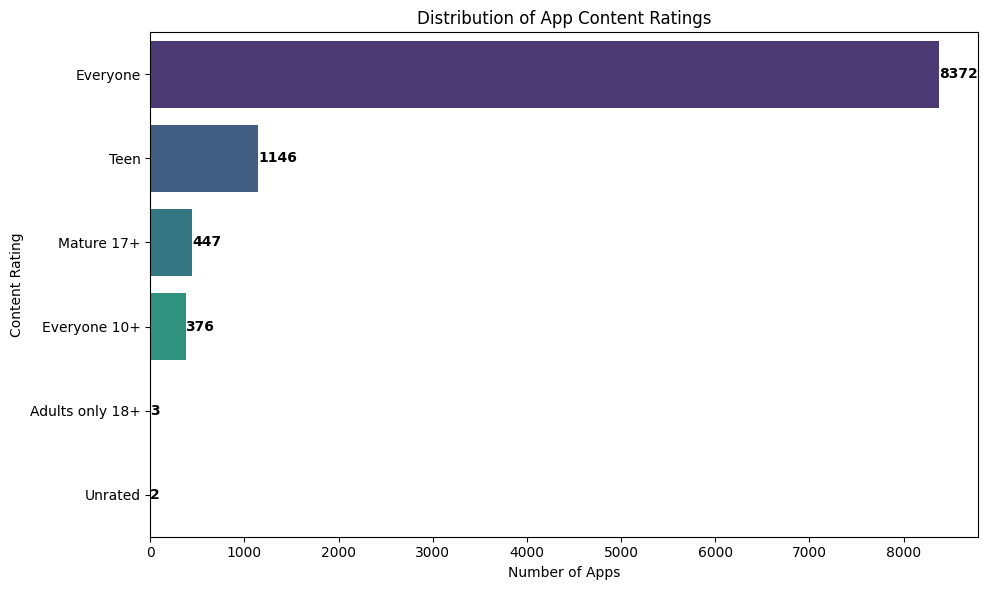

In [30]:
# Get the value counts for 'Content Rating'
content_rating_counts = df['Content Rating'].value_counts()

# Display the most common content rating
most_common_rating = content_rating_counts.index[0]
print(f"The most common content rating is: {most_common_rating}")

# Display the distribution
print("\nDistribution of Content Ratings:")
display(content_rating_counts)

# Create a horizontal bar plot with annotations
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=content_rating_counts.values, y=content_rating_counts.index, palette='viridis', orient='h')

plt.xlabel('Number of Apps')
plt.ylabel('Content Rating')
plt.title('Distribution of App Content Ratings')

# Add annotations to each bar
for i, v in enumerate(content_rating_counts.values):
    ax.text(v + 0.1, i, str(v), ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### What are the top 5 most installed apps?

Top 5 Most Installed Apps:


,App,Avg_Installs
336,WhatsApp Messenger,1000000000
2554,Google+,1000000000
3127,Google Street View,1000000000
3816,Google News,1000000000
3223,Maps - Navigate & Explore,1000000000


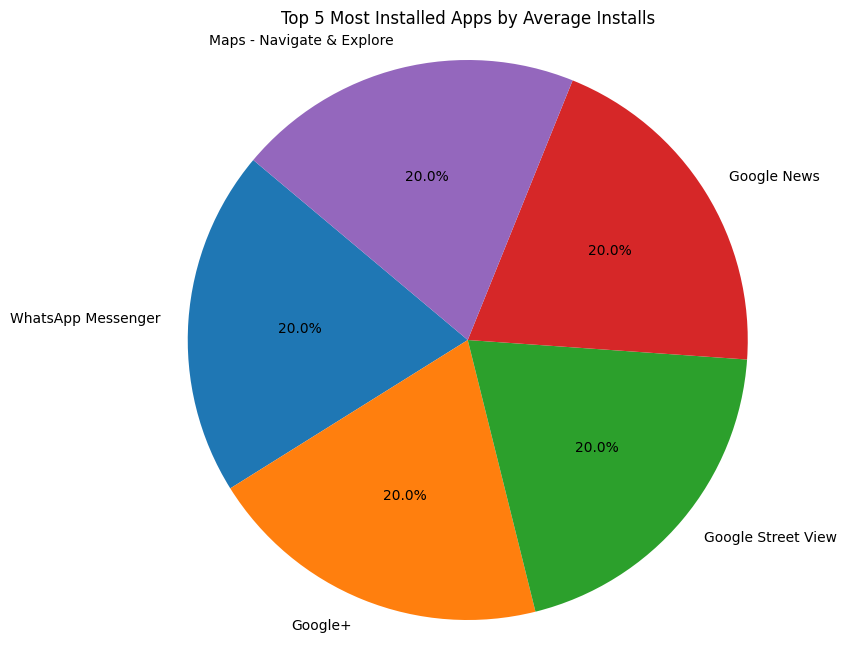

In [31]:
# Sort by 'Avg_Installs' in descending order and get the top 5 apps
top_5_installed_apps = df.sort_values(by='Avg_Installs', ascending=False).head(5)

# Display the top 5 apps
print("Top 5 Most Installed Apps:")
display(top_5_installed_apps[['App', 'Avg_Installs']])

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_installed_apps['Avg_Installs'], labels=top_5_installed_apps['App'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Installed Apps by Average Installs')
plt.axis('equal') 
plt.show()

### How many apps have a rating of 4.0 and above?

In [32]:
# Count the number of apps with a rating of 4.0 and above
apps_high_rating = df[df['Rating'] >= 4.0]
count_high_rating = len(apps_high_rating)

# Display the count
print(f"Number of apps with a rating of 4.0 and above: {count_high_rating}")


Number of apps with a rating of 4.0 and above: 8402


### What is the average number of reviews for free vs paid apps?

Average Number of Reviews for Free vs Paid Apps:


,Type,Reviews
0,Free,437690.492487
1,Paid,11946.864829


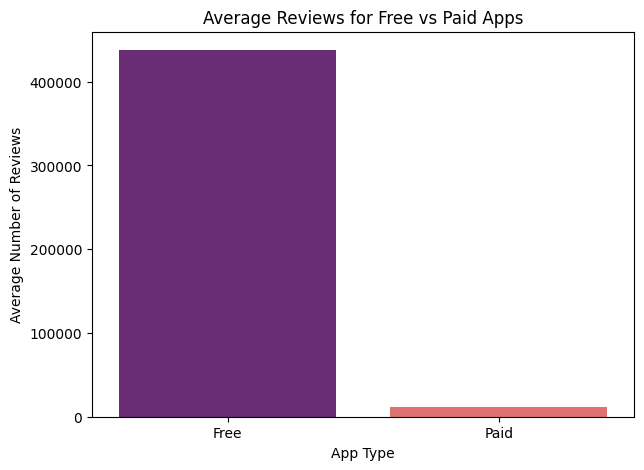

In [33]:
# Calculate the average number of reviews for free vs paid apps
average_reviews_by_type = df.groupby('Type')['Reviews'].mean().reset_index()

# Display the average reviews by type
print("Average Number of Reviews for Free vs Paid Apps:")
display(average_reviews_by_type)

# Create a bar plot to visualize the average reviews by type
plt.figure(figsize=(7, 5))
sns.barplot(x='Type', y='Reviews', data=average_reviews_by_type, palette='magma')
plt.xlabel('App Type')
plt.ylabel('Average Number of Reviews')
plt.title('Average Reviews for Free vs Paid Apps')
plt.show()

### What is the average app size for each category?

Average App Size by Category:


,Category,Size_MB
14,GAME,40.767008
11,FAMILY,26.915180
28,SPORTS,22.428985
30,TRAVEL_AND_LOCAL,21.697708
22,PARENTING,21.561667
13,FOOD_AND_DRINK,20.157258
15,HEALTH_AND_FITNESS,19.778682
1,AUTO_AND_VEHICLES,19.208948
20,MEDICAL,18.945006
9,ENTERTAINMENT,18.818018


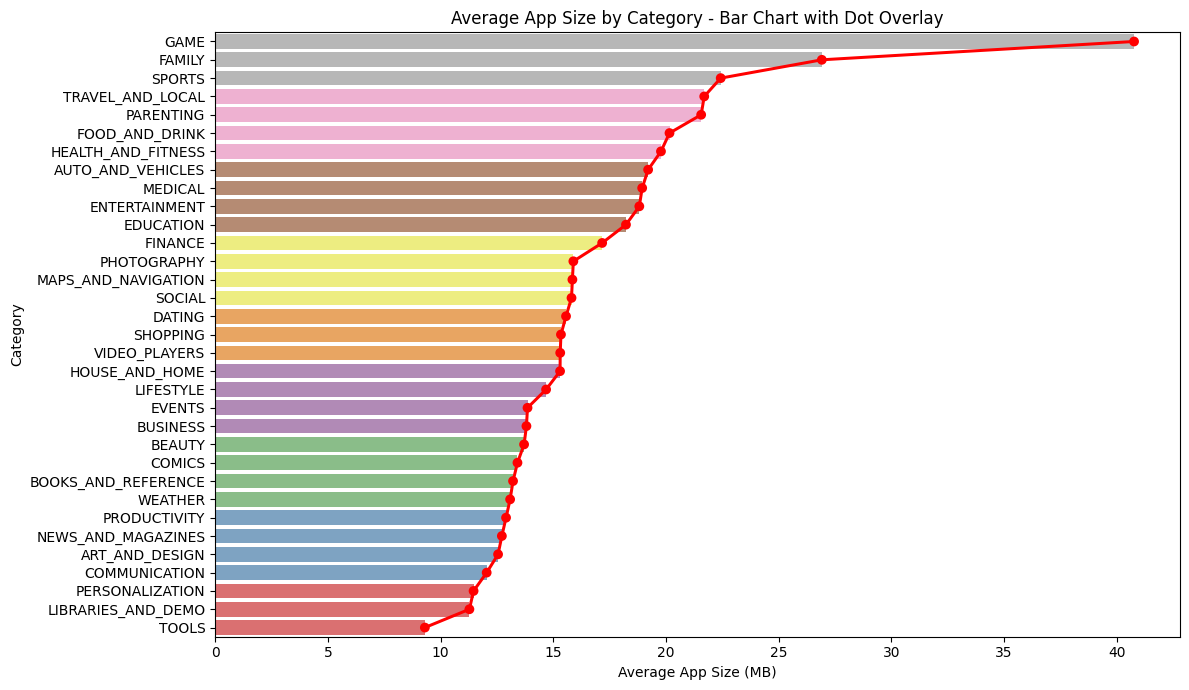

In [34]:
# Calculate the average app size for each category
average_size_by_category = df.groupby('Category')['Size_MB'].mean().reset_index()

# Sort the categories by average size for better visualization
average_size_by_category = average_size_by_category.sort_values(by='Size_MB', ascending=False)

# Display the average size by category
print("Average App Size by Category:")
display(average_size_by_category)

plt.figure(figsize=(12, 7))
# Bar plot
sns.barplot(x='Size_MB', y='Category', data=average_size_by_category, palette='Set1_r', alpha=0.7)
# Point plot overlay
sns.pointplot(x='Size_MB', y='Category', data=average_size_by_category, color='red', markers='o', scale=0.8)
plt.xlabel('Average App Size (MB)')
plt.ylabel('Category')
plt.title('Average App Size by Category - Bar Chart with Dot Overlay')
plt.tight_layout()
plt.show()

### How many apps were last updated in 2018?

In [35]:
# Filter for apps updated in 2018
apps_updated_2018 = df[df['Last Updated'].dt.year == 2018]

# Count the number of apps
count_updated_2018 = len(apps_updated_2018)

# Display the count
print(f"Number of apps last updated in 2018: {count_updated_2018}")

Number of apps last updated in 2018: 6929


### What is the correlation between the number of installs and the app rating?

The correlation between the number of installs and the app rating is: 0.05


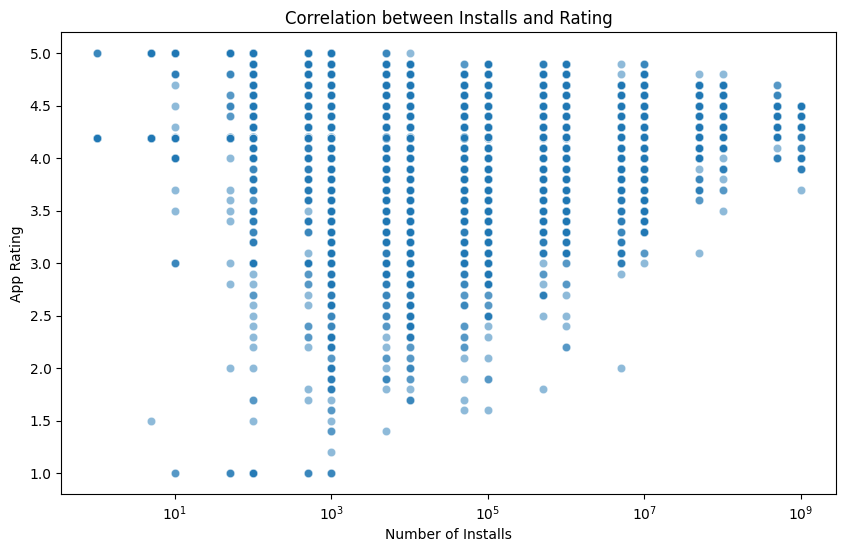

In [36]:
# Calculate the correlation between 'Avg_Installs' and 'Rating'
correlation = df['Avg_Installs'].corr(df['Rating'])

# Display the correlation coefficient
print(f"The correlation between the number of installs and the app rating is: {correlation:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Installs', y='Rating', data=df, alpha=0.5)
plt.xlabel('Number of Installs')
plt.ylabel('App Rating')
plt.title('Correlation between Installs and Rating')
plt.xscale('log') # Use a log scale for installs due to large range
plt.show()

### Which app categories have the highest average rating?

Average App Rating by Category:


,Category,Rating
8,EDUCATION,4.374535
0,ART_AND_DESIGN,4.368260
10,EVENTS,4.362520
3,BOOKS_AND_REFERENCE,4.311599
23,PERSONALIZATION,4.304104
22,PARENTING,4.281590
14,GAME,4.277438
2,BEAUTY,4.260094
15,HEALTH_AND_FITNESS,4.251111
27,SOCIAL,4.246513


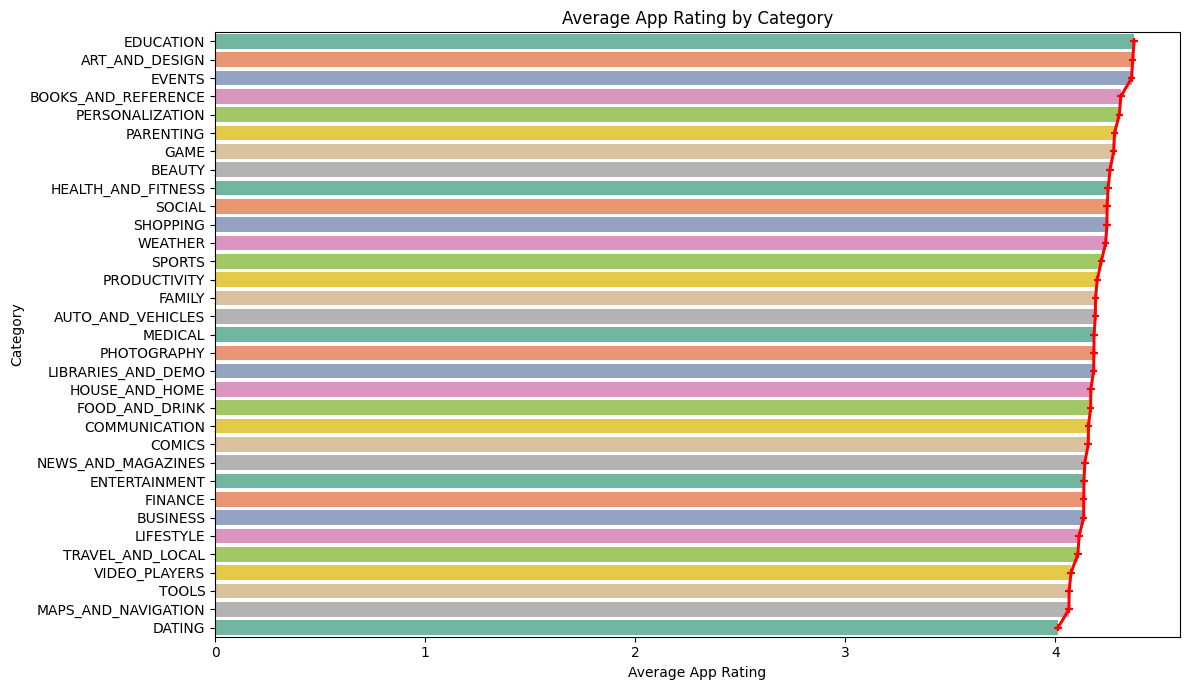

In [37]:
# Calculate the average rating for each category
average_rating_by_category = df.groupby('Category')['Rating'].mean().reset_index()

# Sort the categories by average rating in descending order
average_rating_by_category = average_rating_by_category.sort_values(by='Rating', ascending=False)

# Display the average rating by category
print("Average App Rating by Category:")
display(average_rating_by_category)

# Create a bar plot to visualize the average rating by category
plt.figure(figsize=(12, 7))
sns.barplot(x='Rating', y='Category', data=average_rating_by_category, palette='Set2')
sns.pointplot(x='Rating', y='Category', data=average_rating_by_category, color='red', markers='+', scale=0.8)
plt.xlabel('Average App Rating')
plt.ylabel('Category')
plt.title('Average App Rating by Category')
plt.tight_layout()
plt.show()

### How does the price of an app affect its average rating?

The correlation between app price and rating is: -0.02


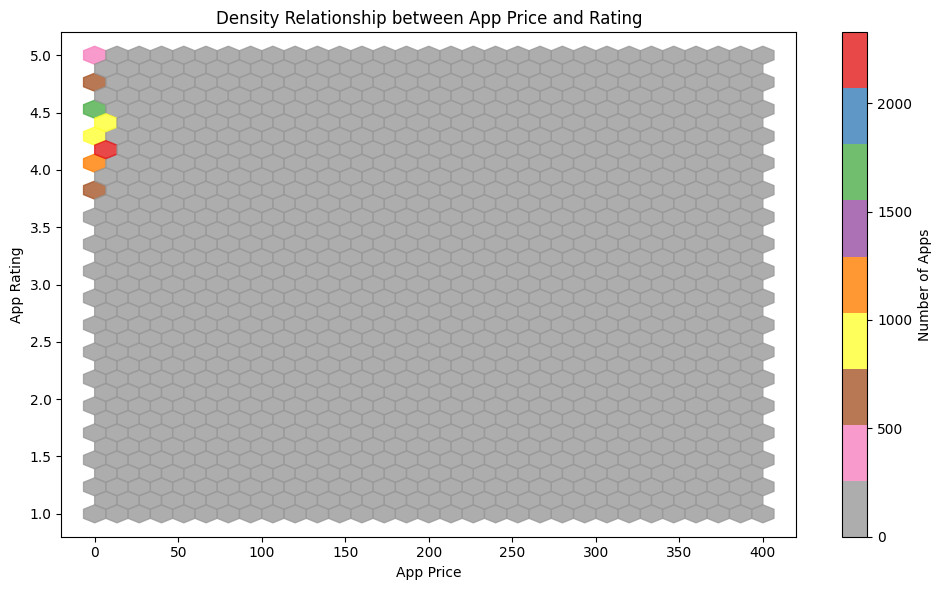

In [38]:
# Calculate the correlation between 'Price' and 'Rating'
correlation_price_rating = df['Price'].corr(df['Rating'])

# Display the correlation coefficient
print(f"The correlation between app price and rating is: {correlation_price_rating:.2f}")

plt.figure(figsize=(10, 6))
plt.hexbin(x=df['Price'], y=df['Rating'], gridsize=30, cmap='Set1_r', alpha=0.8)
plt.colorbar(label='Number of Apps')
plt.xlabel('App Price')
plt.ylabel('App Rating')
plt.title('Density Relationship between App Price and Rating')
plt.tight_layout()
plt.show()

### What is the distribution of app ratings across different content ratings?

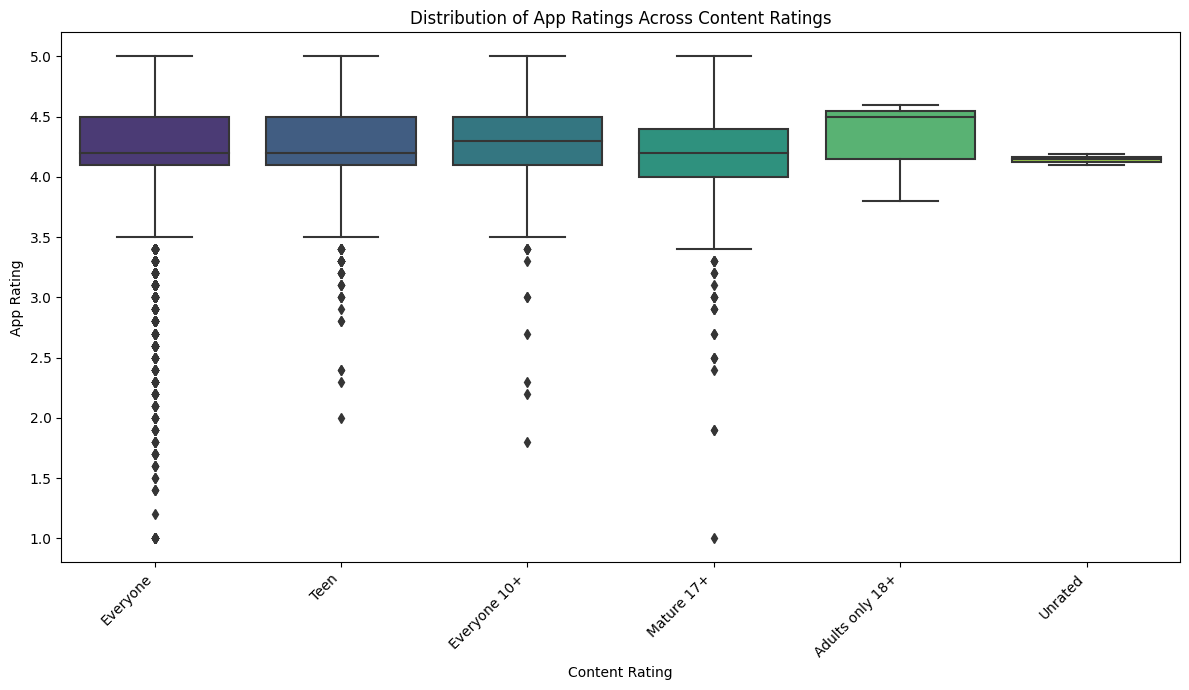

In [39]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Content Rating', y='Rating', data=df, palette='viridis')
plt.xlabel('Content Rating')
plt.ylabel('App Rating')
plt.title('Distribution of App Ratings Across Content Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Which genres have the most apps with over 1 million installs?

Top Genres with Over 1 Million Installs:


Category
GAME                  714
FAMILY                631
TOOLS                 289
PHOTOGRAPHY           213
COMMUNICATION         191
PRODUCTIVITY          180
SPORTS                143
SOCIAL                141
HEALTH_AND_FITNESS    130
SHOPPING              128
Name: count, dtype: int64

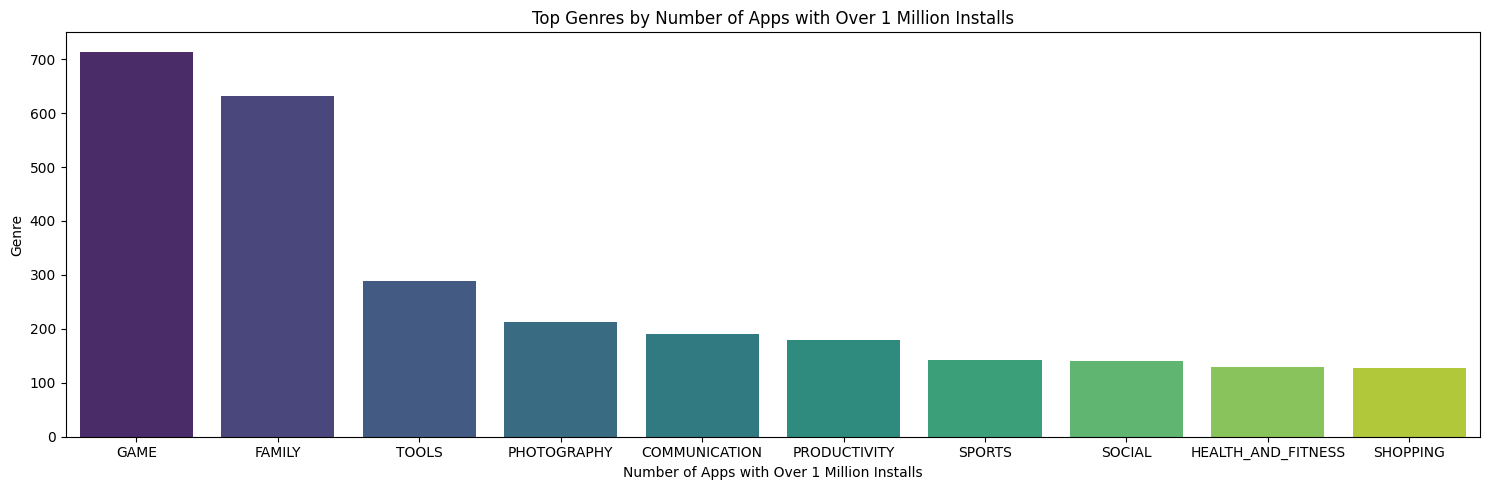

In [40]:
# Filter for apps with over 1 million installs
apps_over_1m_installs = df[df['Avg_Installs'] >= 1000000]

# Count the occurrences of each genre in this filtered data
genre_counts_over_1m = apps_over_1m_installs['Category'].value_counts().head(10) # Limiting to top 10 for clarity

# Display the top genres with over 1 million installs
print("Top Genres with Over 1 Million Installs:")
display(genre_counts_over_1m)

# Create a bar plot to visualize the top genres
plt.figure(figsize=(15, 5))
sns.barplot(y=genre_counts_over_1m.values, x=genre_counts_over_1m.index, palette='viridis')
plt.xlabel('Number of Apps with Over 1 Million Installs')
plt.ylabel('Genre')
plt.title('Top Genres by Number of Apps with Over 1 Million Installs')
plt.tight_layout()
plt.show()

### How frequently do apps get updated?

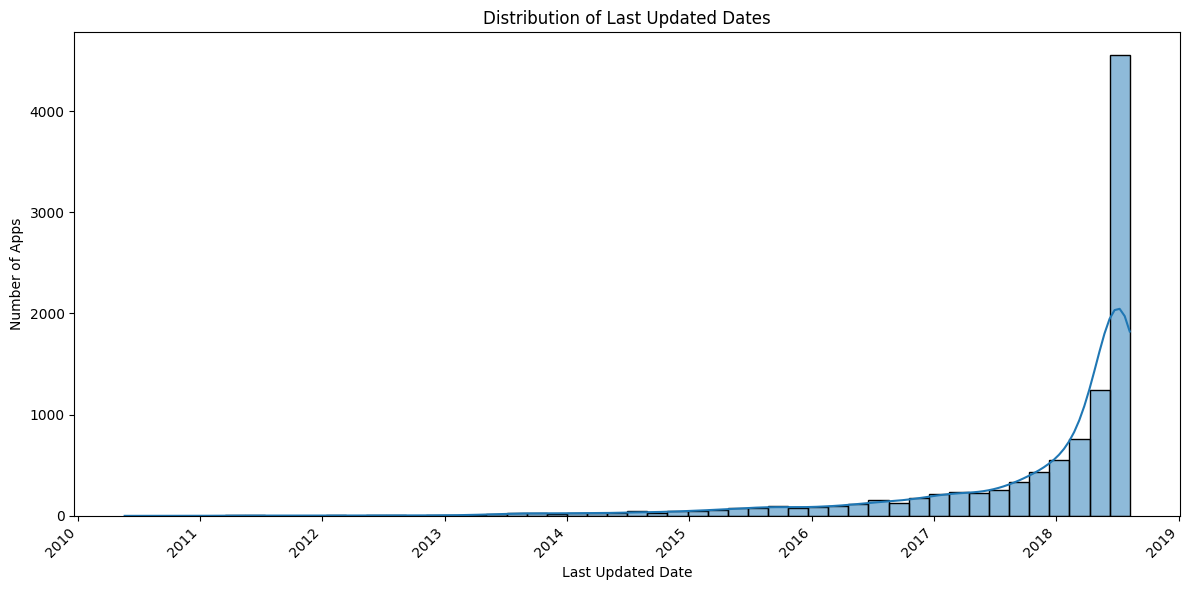

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Last Updated'], bins=50, kde=True)
plt.xlabel('Last Updated Date')
plt.ylabel('Number of Apps')
plt.title('Distribution of Last Updated Dates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### What is the impact of app size on the number of installs?

The correlation between app size and the number of installs is: 0.05


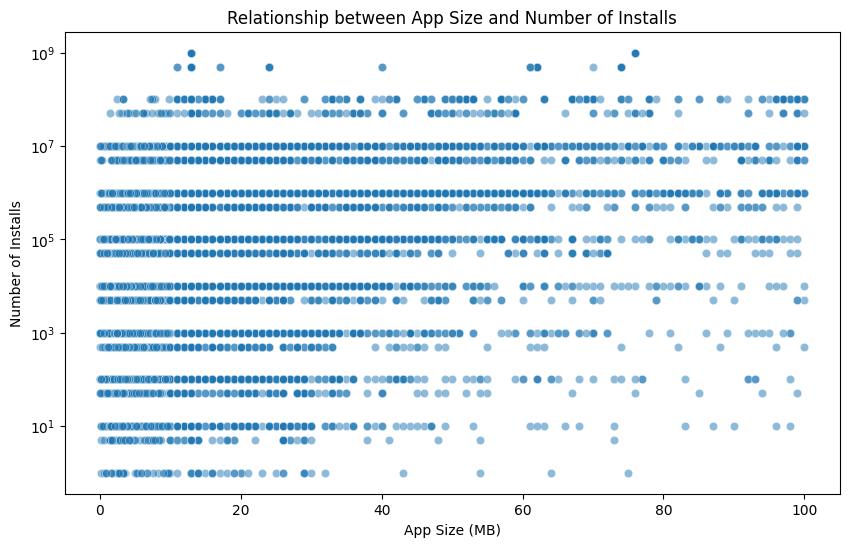

In [42]:
# Calculate the correlation between 'Size_MB' and 'Avg_Installs'
correlation_size_installs = df['Size_MB'].corr(df['Avg_Installs'])

# Display the correlation coefficient
print(f"The correlation between app size and the number of installs is: {correlation_size_installs:.2f}")

# Create a scatter plot to visualize the relationship between size and installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size_MB', y='Avg_Installs', data=df, alpha=0.5)
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Installs')
plt.title('Relationship between App Size and Number of Installs')
plt.yscale('log') 
plt.show()

### Which apps have the highest number of reviews, and what are their ratings?

Top 10 Most Reviewed Apps and Their Ratings:


,App,Reviews,Rating
2544,Facebook,78158306,4.1
336,WhatsApp Messenger,69119316,4.4
2545,Instagram,66577313,4.5
335,Messenger – Text and Video Chat for Free,56642847,4.0
1670,Clash of Clans,44891723,4.6
4005,Clean Master- Space Cleaner & Antivirus,42916526,4.7
1654,Subway Surfers,27722264,4.5
3665,YouTube,25655305,4.3
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
1660,Clash Royale,23133508,4.6


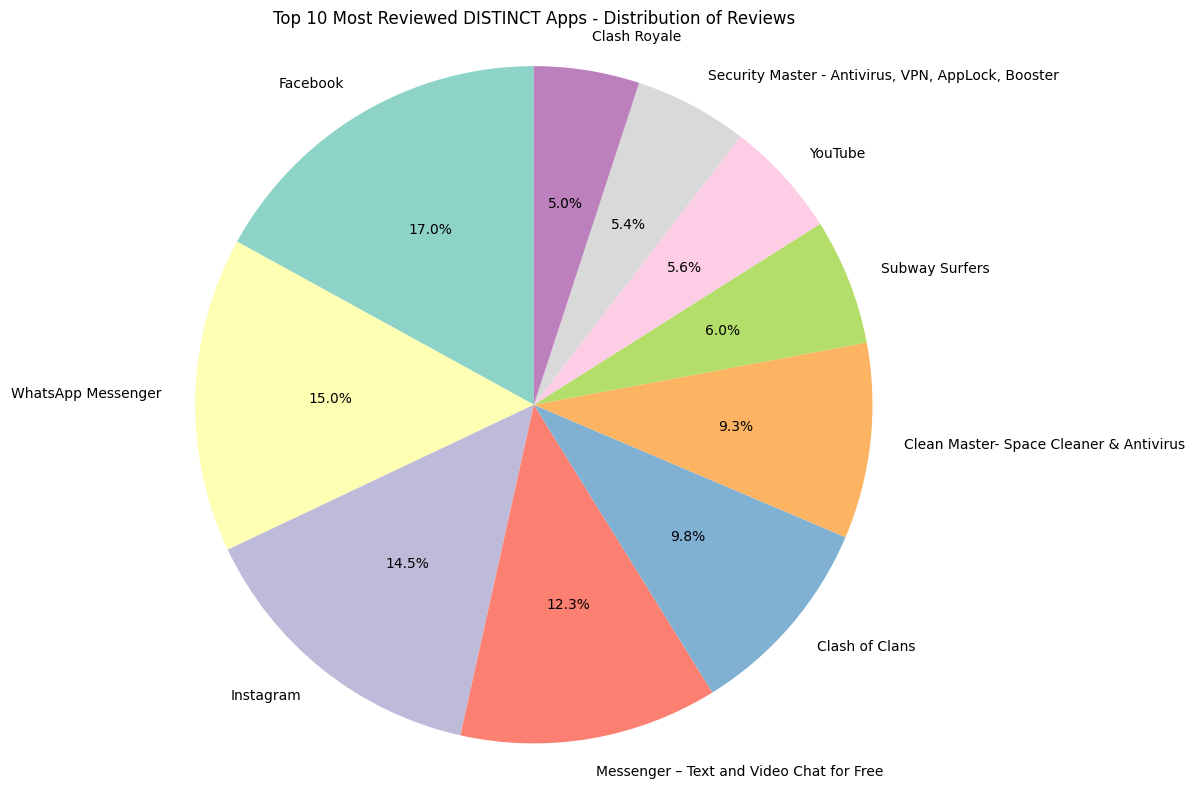

In [43]:
# Remove duplicate apps first, then sort by reviews
distinct_apps = df.drop_duplicates(subset='App', keep='first')  # Keep first occurrence of each app
top_reviewed_apps = distinct_apps.sort_values(by='Reviews', ascending=False).head(10)

# Display the top reviewed apps and their ratings
print("Top 10 Most Reviewed Apps and Their Ratings:")
display(top_reviewed_apps[['App', 'Reviews', 'Rating']])

# Create a pie chart to visualize the number of reviews for the top apps
plt.figure(figsize=(12, 8))
plt.pie(top_reviewed_apps['Reviews'], labels=top_reviewed_apps['App'], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set3', len(top_reviewed_apps)))
plt.title('Top 10 Most Reviewed DISTINCT Apps - Distribution of Reviews')
plt.axis('equal')
plt.tight_layout()
plt.show()

### How does the content rating distribution differ between free and paid apps?

Content Rating Distribution by App Type (Counts):


Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3,7713,344,428,1094,2
Paid,0,659,32,19,52,0



Content Rating Distribution by App Type (Proportions):


Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,0.000313,0.804779,0.035893,0.044658,0.114149,0.000209
Paid,0.000000,0.864829,0.041995,0.024934,0.068241,0.000000


<Figure size 1000x700 with 0 Axes>

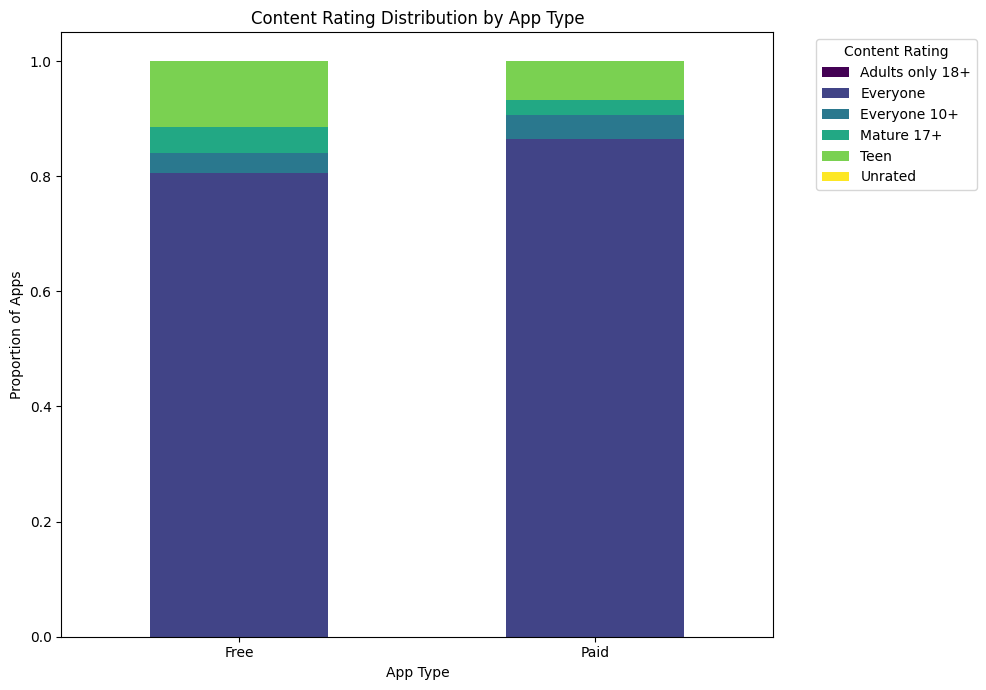

In [44]:
# Group by Type and Content Rating and count the occurrences
content_rating_by_type = df.groupby(['Type', 'Content Rating']).size().unstack(fill_value=0)

# Calculate proportions within each type for better comparison
content_rating_by_type_prop = content_rating_by_type.apply(lambda x: x / x.sum(), axis=1)

# Display the distribution counts and proportions
print("Content Rating Distribution by App Type (Counts):")
display(content_rating_by_type)

print("\nContent Rating Distribution by App Type (Proportions):")
display(content_rating_by_type_prop)


# Visualize the distribution using a stacked bar chart of proportions
plt.figure(figsize=(10, 7))
content_rating_by_type_prop.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.xlabel('App Type')
plt.ylabel('Proportion of Apps')
plt.title('Content Rating Distribution by App Type')
plt.xticks(rotation=0)
plt.legend(title='Content Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### What are the top 5 categories with the most installs?

Top 5 Categories with the Most Installs:


,Category,Avg_Installs
14,GAME,31544024415
6,COMMUNICATION,24152276251
27,SOCIAL,12513867902
25,PRODUCTIVITY,12463091369
29,TOOLS,11452271905


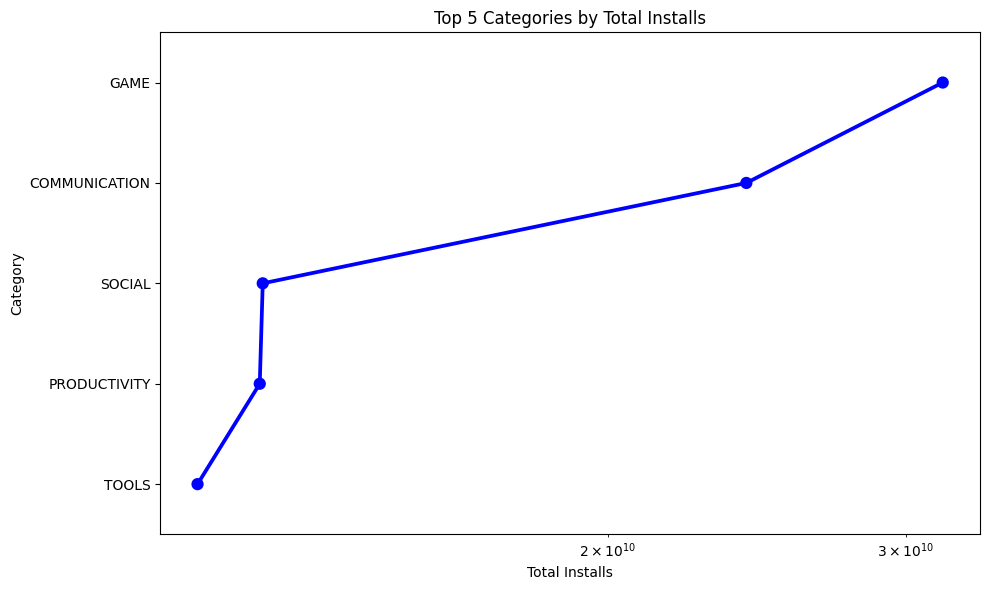

In [45]:
# Group by Category and sum the average installs
category_installs = df.groupby('Category')['Avg_Installs'].sum().reset_index()

# Sort by total installs in descending order and get the top 5
top_5_categories_by_installs = category_installs.sort_values(by='Avg_Installs', ascending=False).head(5)

# Display the top 5 categories by installs
print("Top 5 Categories with the Most Installs:")
display(top_5_categories_by_installs)

# Visualize the top 5 categories by installs using a point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Avg_Installs', y='Category', data=top_5_categories_by_installs, color='blue', markers='o', linestyles='-')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.title('Top 5 Categories by Total Installs')
plt.xscale('log') # Use log scale for installs due to large values
plt.tight_layout()
plt.show()

### What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?

Top 10 Apps with the Highest Ratings and their Reviews and Installs:


,App,Rating,Reviews,Avg_Installs
6727,BS-Mobile,5.0,1,50
6396,Bk Usha behn,5.0,10,1000
5685,Jobs in Canada - Emplois au Canada,5.0,2,1000
7506,CL REPL,5.0,47,1000
9498,EK Bailey Preaching Conference,5.0,3,500
8018,30WPM Amateur ham radio Koch CW Morse code tra...,5.0,1,10
7514,CL Keyboard - Myanmar Keyboard (No Ads),5.0,24,5000
7517,CL Notifier,5.0,36,100
8014,Morse Player,5.0,12,100
9496,Master E.K,5.0,90,1000


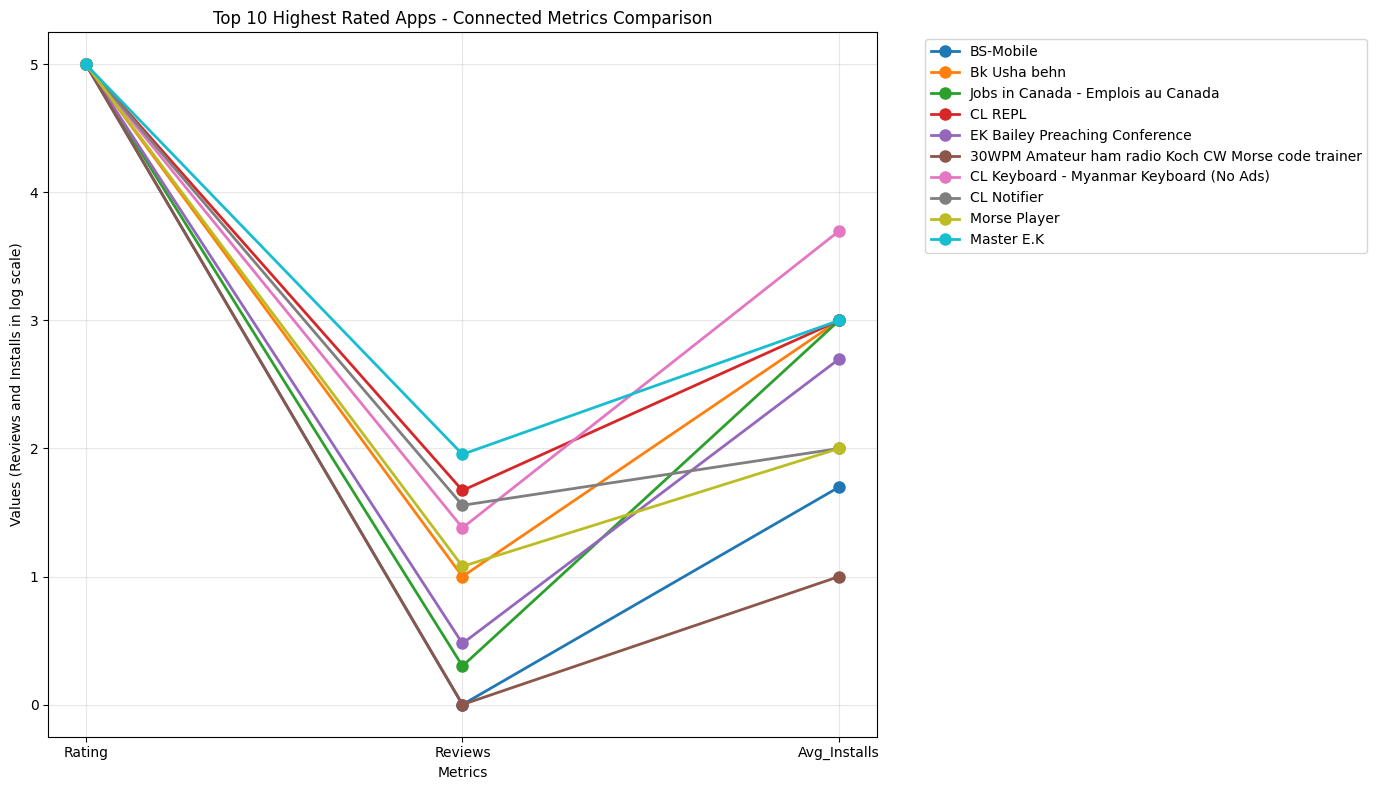

In [46]:
# Sort by 'Rating' in descending order and get the top 10 apps
top_rated_apps = df.sort_values(by='Rating', ascending=False).head(10)

# Display the top 10 apps with their ratings, reviews, and installs
print("Top 10 Apps with the Highest Ratings and their Reviews and Installs:")
display(top_rated_apps[['App', 'Rating', 'Reviews', 'Avg_Installs']])

# Get the top 10 apps with the highest ratings
plt.figure(figsize=(14, 8))

# Plot lines connecting the three metrics for each app
for i, app in enumerate(top_rated_apps['App']):
    metrics = ['Rating', 'Reviews', 'Avg_Installs']
    values = [top_rated_apps['Rating'].iloc[i],
              np.log10(top_rated_apps['Reviews'].iloc[i]),
              np.log10(top_rated_apps['Avg_Installs'].iloc[i])]

    plt.plot(metrics, values, marker='o', linewidth=2, label=app, markersize=8)

plt.xlabel('Metrics')
plt.ylabel('Values (Reviews and Installs in log scale)')
plt.title('Top 10 Highest Rated Apps - Connected Metrics Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?

The correlation between the number of reviews and the number of installs is: 0.63


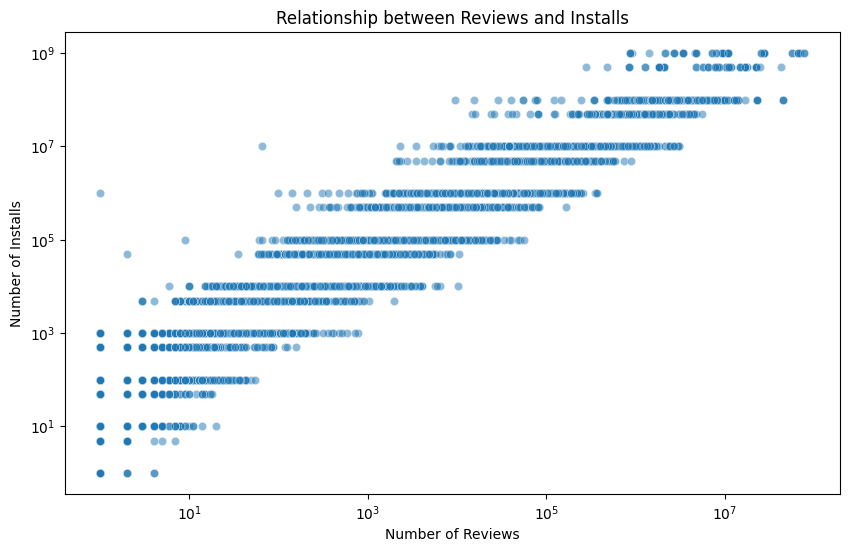

In [47]:
# Calculate the correlation between Reviews and Avg_Installs
correlation_reviews_installs = df['Reviews'].corr(df['Avg_Installs'])

# Display the correlation coefficient
print(f"The correlation between the number of reviews and the number of installs is: {correlation_reviews_installs:.2f}")

# Create a scatter plot to visualize the relationship between reviews and installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Avg_Installs', data=df, alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Installs')
plt.title('Relationship between Reviews and Installs')
plt.xscale('log') # Use log scale for reviews due to large range
plt.yscale('log') # Use log scale for installs due to large range
plt.show()

The correlation coefficient is 0.63, which suggests a moderate positive linear relationship. The scatter plot, using log scales for both axes due to the wide range of values, shows that as the number of reviews increases, the number of installs also tends to increase. This is a noticeable pattern, indicating that apps with more reviews generally have more installs.

### How does the average rating of apps change with the number of installs? Create a binned analysis.

Average App Rating by Install Bin:


,Install_Range,Rating
0,0-100,4.259338
1,"500-1,000",4.115422
2,"5,000-5,000",4.037073
3,"10,000-10,000",4.041950
4,"50,000-100,000",4.096489
5,"500,000-500,000",4.173236
6,"1,000,000-1,000,000",4.218816
7,"5,000,000-5,000,000",4.239385
8,"10,000,000-10,000,000",4.313604
9,"50,000,000-1,000,000,000",4.372170


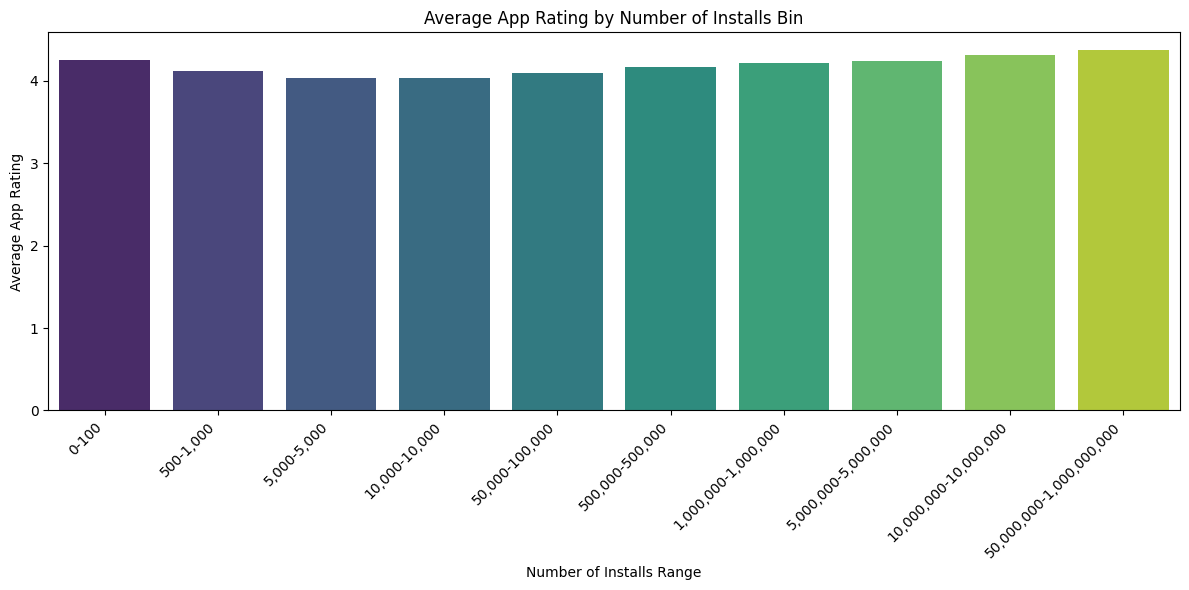

In [48]:
# Create bins for 'Avg_Installs'
df['Install_Bins'] = pd.qcut(df['Avg_Installs'], q=10, labels=False, duplicates='drop')

# Calculate the average rating for each install bin
average_rating_by_installs = df.groupby('Install_Bins')['Rating'].mean().reset_index()

# Map the bin labels to the actual install ranges for better interpretation
bin_edges = df.groupby('Install_Bins')['Avg_Installs'].agg(['min', 'max']).reset_index()
average_rating_by_installs['Install_Range'] = bin_edges.apply(lambda row: f"{row['min']:,}-{row['max']:,}", axis=1)


# Display the average rating by install bin
print("Average App Rating by Install Bin:")
display(average_rating_by_installs[['Install_Range', 'Rating']])

# Create a bar plot to visualize the average rating by install bin
plt.figure(figsize=(12, 6))
sns.barplot(x='Install_Range', y='Rating', data=average_rating_by_installs, palette='viridis')
plt.xlabel('Number of Installs Range')
plt.ylabel('Average App Rating')
plt.title('Average App Rating by Number of Installs Bin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?

Average App Rating by Category:


,Category,Rating
8,EDUCATION,4.374535
0,ART_AND_DESIGN,4.368260
10,EVENTS,4.362520
3,BOOKS_AND_REFERENCE,4.311599
23,PERSONALIZATION,4.304104
22,PARENTING,4.281590
14,GAME,4.277438
2,BEAUTY,4.260094
15,HEALTH_AND_FITNESS,4.251111
27,SOCIAL,4.246513


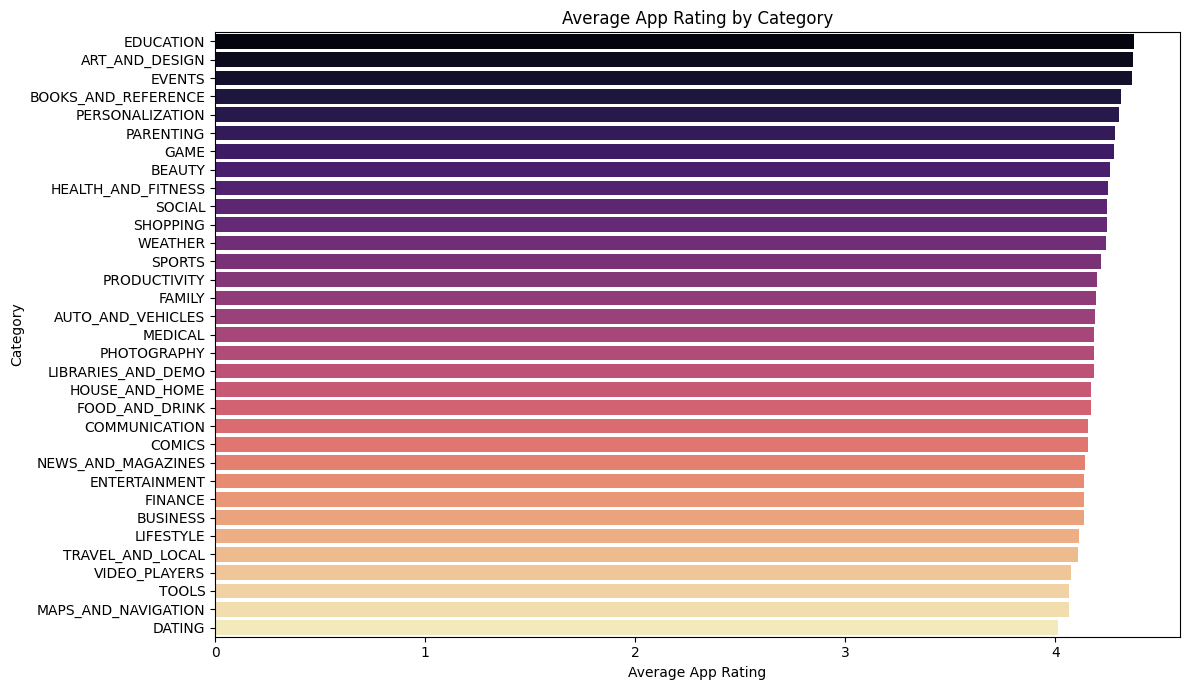

In [49]:
# Calculate the average rating for each category
average_rating_by_category = df.groupby('Category')['Rating'].mean().reset_index()

# Sort the categories by average rating in descending order
average_rating_by_category = average_rating_by_category.sort_values(by='Rating', ascending=False)

# Display the average rating by category
print("Average App Rating by Category:")
display(average_rating_by_category)

# Create a bar plot to visualize the average rating by category
plt.figure(figsize=(12, 7))
sns.barplot(x='Rating', y='Category', data=average_rating_by_category, palette='magma')
plt.xlabel('Average App Rating')
plt.ylabel('Category')
plt.title('Average App Rating by Category')
plt.tight_layout()
plt.show()

## OUTLIER ANALYSIS

### Outlier Detection

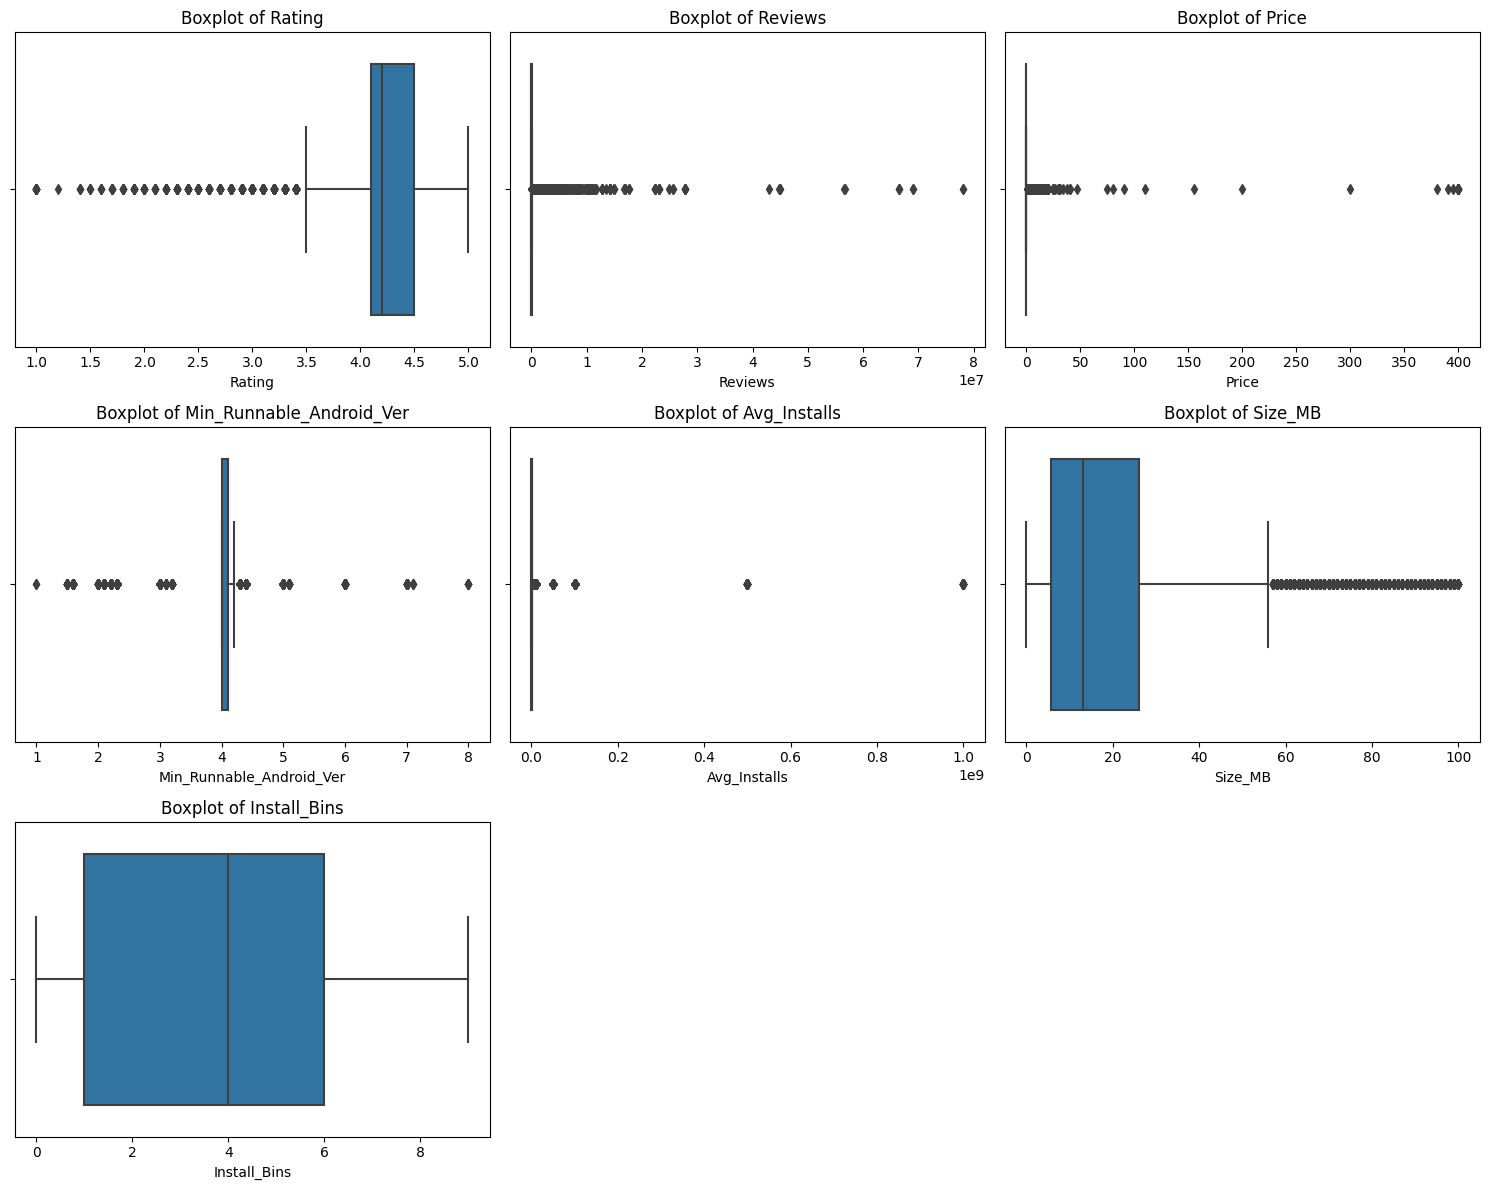

In [50]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

So, we are going to winsorize them so as to perform better at analysis

### Outlier Handling

In [51]:
# only numerical data
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())

Outliers handled with Winsorization using IQR:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

      Reviews  Size     Installs  Type  Price Content Rating Last Updated  \
0     159.000   19M      10,000+  Free    0.0       Everyone   2018-01-07   
1     967.000   14M     500,000+  Free    0.0       Everyone   2018-01-15   
2   87510.000  8.7M   5,000,000+  Free    0.0       Everyone   2018-08-01   
3  116447.625   25M  50,000,000+  Free    0.0           Teen   2018-06-08   
4     967.000  2.8M     100,000+  Free    0.0       Everyone   2018-06-20   

         

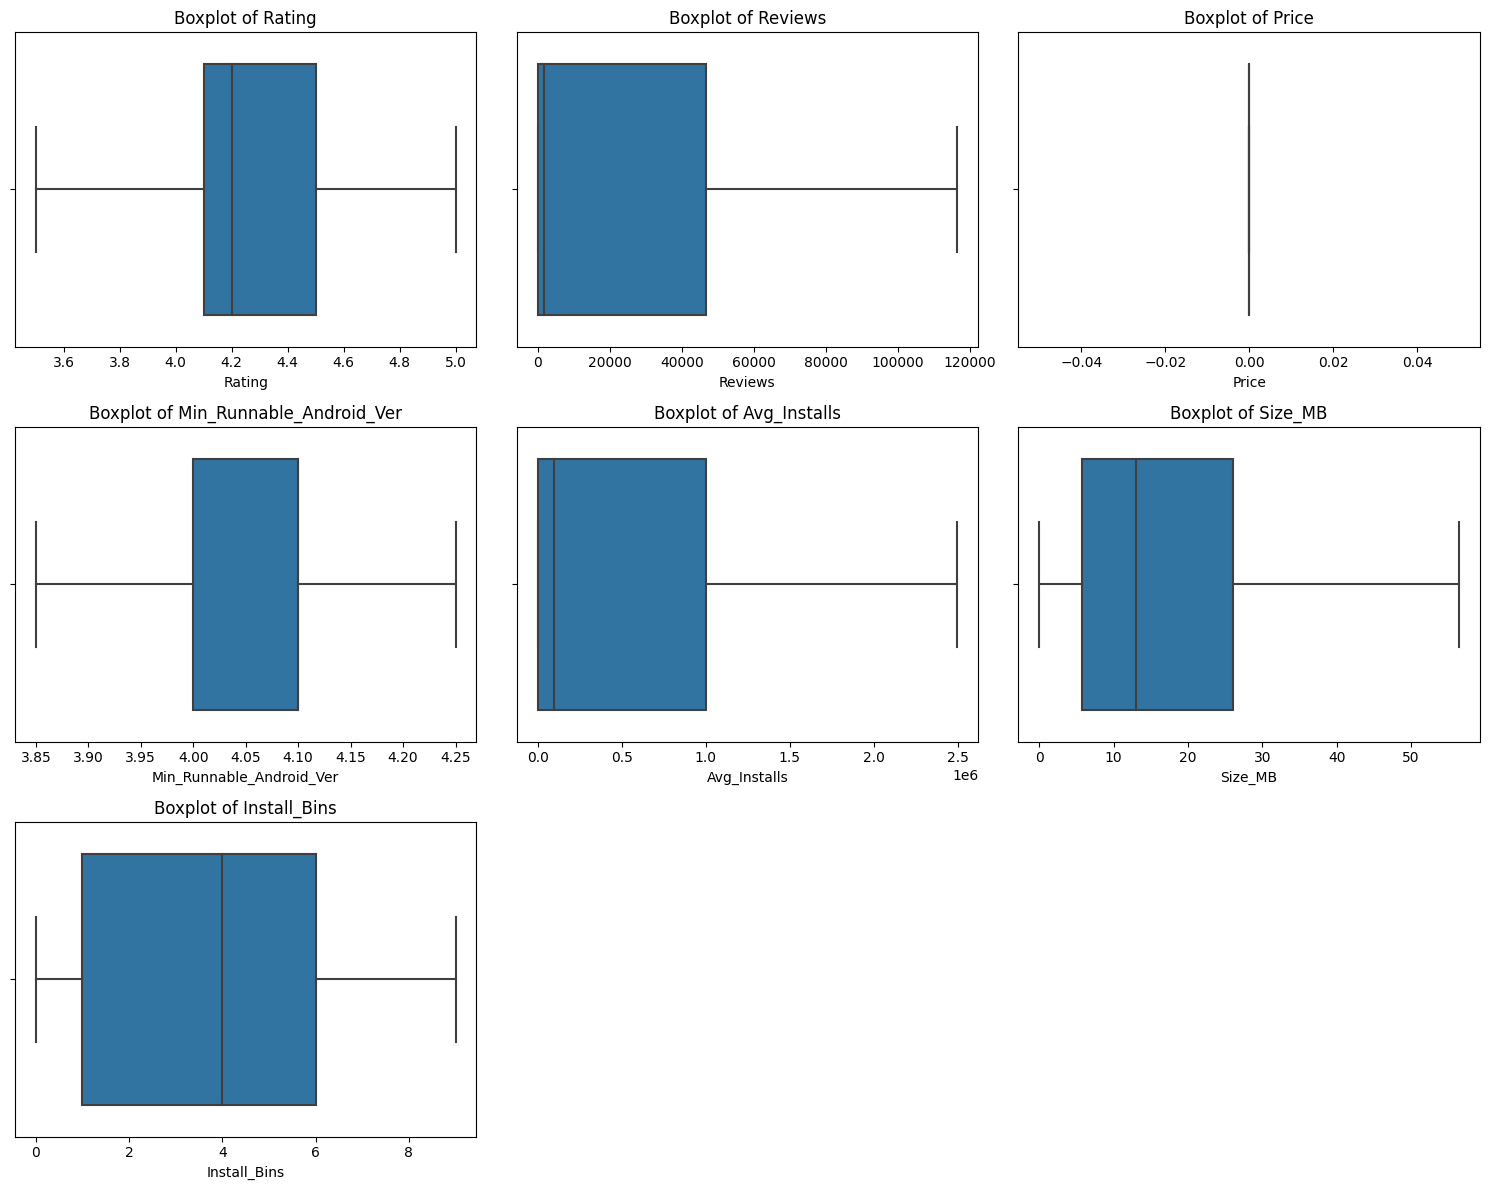

In [52]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## CONCLUSION

Based on the data loading, cleaning, and exploratory data analysis we have performed on the Google Play Store dataset, here is a detailed conclusion summarizing the key findings:

**Data Overview and Cleaning:**
We started with a dataset containing information about over 10,000 Google Play Store apps. Initial exploration revealed the presence of duplicate entries and missing values, particularly in the 'Rating', 'Type', 'Content Rating', 'Current Ver', and 'Android Ver' columns. We addressed these issues by dropping duplicate rows and handling null values, specifically filling missing ratings with the mean and dropping rows with nulls in columns with very few missing values. We also transformed the 'Size', 'Installs', and 'Price' columns into numerical formats ('Size_MB', 'Avg_Installs', and 'Price') for quantitative analysis and created a 'Min_Runnable_Android_Ver' column. The 'Genres' column was dropped during the process.

**Key Findings from Exploratory Data Analysis:**

1.  **Average Rating:** The average rating of apps in this dataset is approximately 4.19, indicating a generally positive user reception for the apps included.
2.  **Unique Categories:** There are 33 unique categories of apps represented in the dataset, showing a diverse range of app types available on the Play Store.
3.  **App Size Distribution:** The distribution of app sizes is skewed towards smaller sizes, with a majority of apps being under 20MB. There are fewer apps in the larger size ranges.
4.  **Free vs Paid Apps:** The vast majority of apps in the dataset are free (over 90%), with a much smaller number of paid apps.
5.  **Content Rating Distribution:** The most common content rating is 'Everyone', indicating that a large proportion of apps are suitable for all age groups. 'Teen' and 'Mature 17+' are the next most frequent ratings.
6.  **Top Installed Apps:** The apps with the highest number of installs are predominantly major apps from large technology companies (e.g., Google, Facebook, WhatsApp), with install counts in the billions.
7.  **Apps with High Ratings:** A significant portion of apps (over 8,400) in the dataset have a rating of 4.0 or above, reinforcing the observation of generally high ratings.
8.  **Average Reviews by Type:** Free apps have a substantially higher average number of reviews compared to paid apps. This could be attributed to the larger user base of free apps leading to more feedback.
9.  **Average Size by Category:** App size varies by category, with 'GAME' and 'FAMILY' categories having the largest average app sizes, likely due to richer content and graphics. 'TOOLS' and 'LIBRARIES_AND_DEMO' categories have the smallest average sizes.
10. **App Updates in 2018:** A large number of apps (over 6,900) in the dataset were last updated in 2018, suggesting that the dataset captures a snapshot where many apps were actively maintained during that period. The distribution of 'Last Updated' dates also confirms a peak in updates around mid-2018.
11. **Correlation between Installs and Rating:** There is a very weak positive correlation (0.05) between the number of installs and the app rating. This suggests that having more installs does not strongly predict a higher rating, and vice versa.
12. **Relationship between Price and Rating:** There is a negligible correlation (-0.02) between app price and rating. Most apps are free, and for paid apps, there is no clear linear relationship between how much an app costs and its average rating.
13. **Ratings Across Content Ratings:** Box plots showed that while the median ratings are somewhat similar across most content ratings (around 4.0 to 4.5), there are differences in the spread and presence of outliers. 'Adults only 18+' and 'Unrated' have very few apps, making their distributions less representative.
14. **Top Genres/Categories by Installs:** 'GAME', 'COMMUNICATION', and 'SOCIAL' are the categories with the highest total number of installs, highlighting the most popular types of apps in terms of user adoption.
15. **Top Reviewed Apps:** The apps with the highest number of reviews are also major, widely used apps, largely overlapping with the top installed apps.
16. **Relationship between Reviews and Installs:** There is a moderate positive correlation (0.63) between the number of reviews and the number of installs. This indicates that apps with more reviews tend to have a higher number of installs, suggesting a relationship between user engagement (reviews) and adoption (installs).
17. **Average Rating by Installs (Binned):** A binned analysis showed a slight trend where apps with higher install counts tend to have a slightly higher average rating, although the difference is not drastic across all install ranges.

**Overall Conclusion:**

The analysis reveals a competitive landscape on the Google Play Store with a large number of free apps and a wide variety of categories. While apps generally have high ratings, the number of installs and price do not appear to be strong predictors of an app's rating. User engagement, as measured by reviews, shows a clearer positive relationship with the number of installs. Certain categories like 'GAME' and 'COMMUNICATION' dominate in terms of total installs, while categories like 'EDUCATION' and 'ART_AND_DESIGN' tend to have higher average ratings. The data also suggests a period of significant updates around 2018 for the apps in this dataset.

This analysis provides valuable insights into the characteristics of apps on the Google Play Store, highlighting trends in popularity, user satisfaction, and distribution across categories and monetization models.